In [114]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt

import copy
import random

In [2]:
%matplotlib notebook

In [30]:
class cube_visualizer:
    #hardcoded he colors of the rubik cube
    color=[
        "#f0f0f0", #white
        "#ff0000", #red
        "#0000ff", #blue
        "#ffa500", #orange
        "#00ff00", #green
        "#ffff00" #yellow
    ]
    
    def add_surface(ax,x,y,z,direction,rgba): #helper function to add flat surface (with color) on a mathplotlib graph
        #(x,y,z) coordinate of origin of the surface
        #direction:
        #    0 - xy
        #    1 - yz
        #    2 - xz

        p1=np.array([[0,0],[1,1]])
        p2=np.array([[0,1],[0,1]])
        d=np.array([[0,0],[0,0]])

        if (direction==0):
            ax.plot_surface(p1+x,p2+y,d+z,color=rgba,shade=False)
        elif (direction==1):
            ax.plot_surface(d+x,p1+y,p2+z,color=rgba,shade=False)
        else :
            ax.plot_surface(p1+x,d+y,p2+z,color=rgba,shade=False)
            
    def plot_cube(ax,colors):
        #U
        cube_visualizer.add_surface(ax,0,1,2,0,cube_visualizer.color[colors[0][0]])
        cube_visualizer.add_surface(ax,1,1,2,0,cube_visualizer.color[colors[0][1]])
        cube_visualizer.add_surface(ax,1,0,2,0,cube_visualizer.color[colors[0][2]])
        cube_visualizer.add_surface(ax,0,0,2,0,cube_visualizer.color[colors[0][3]])
        
        #L
        cube_visualizer.add_surface(ax,0,1,1,1,cube_visualizer.color[colors[1][0]])
        cube_visualizer.add_surface(ax,0,0,1,1,cube_visualizer.color[colors[1][1]])
        cube_visualizer.add_surface(ax,0,0,0,1,cube_visualizer.color[colors[1][2]])
        cube_visualizer.add_surface(ax,0,1,0,1,cube_visualizer.color[colors[1][3]])
        
        #F
        cube_visualizer.add_surface(ax,0,0,1,2,cube_visualizer.color[colors[2][0]])
        cube_visualizer.add_surface(ax,1,0,1,2,cube_visualizer.color[colors[2][1]])
        cube_visualizer.add_surface(ax,1,0,0,2,cube_visualizer.color[colors[2][2]])
        cube_visualizer.add_surface(ax,0,0,0,2,cube_visualizer.color[colors[2][3]])
        
        #R
        cube_visualizer.add_surface(ax,2,0,1,1,cube_visualizer.color[colors[3][0]])
        cube_visualizer.add_surface(ax,2,1,1,1,cube_visualizer.color[colors[3][1]])
        cube_visualizer.add_surface(ax,2,1,0,1,cube_visualizer.color[colors[3][2]])
        cube_visualizer.add_surface(ax,2,0,0,1,cube_visualizer.color[colors[3][3]])
        
        #B
        cube_visualizer.add_surface(ax,1,2,1,2,cube_visualizer.color[colors[4][0]])
        cube_visualizer.add_surface(ax,0,2,1,2,cube_visualizer.color[colors[4][1]])
        cube_visualizer.add_surface(ax,0,2,0,2,cube_visualizer.color[colors[4][2]])
        cube_visualizer.add_surface(ax,1,2,0,2,cube_visualizer.color[colors[4][3]])
        
        #D
        cube_visualizer.add_surface(ax,0,0,0,0,cube_visualizer.color[colors[5][0]])
        cube_visualizer.add_surface(ax,1,0,0,0,cube_visualizer.color[colors[5][1]])
        cube_visualizer.add_surface(ax,1,1,0,0,cube_visualizer.color[colors[5][2]])
        cube_visualizer.add_surface(ax,0,1,0,0,cube_visualizer.color[colors[5][3]])
            
    def default_cube(): #just to test the color scheme on a 1x1x1 cube
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        cube_visualizer.add_surface(ax,0,0,1,0,cube_visualizer.color[0])
        cube_visualizer.add_surface(ax,0,0,0,1,cube_visualizer.color[1])
        cube_visualizer.add_surface(ax,0,0,0,2,cube_visualizer.color[2])
        cube_visualizer.add_surface(ax,1,0,0,1,cube_visualizer.color[3])
        cube_visualizer.add_surface(ax,0,1,0,2,cube_visualizer.color[4])
        cube_visualizer.add_surface(ax,0,0,0,0,cube_visualizer.color[5])

        plt.axis("off")

        plt.show()

To ensure that we are not double counting states that are identical up to rotation, we will only use ULF moves and their inverse. This will keep one of the corners of the cube in the same position and therefore each state that we traverse is unique.

In [152]:
class cube: #the class to represent the state of a cube
    #each sticker of the cube will be represented as a number and stored in a 6x4 array
    
    #faces
    #   0          U
    # 1 2 3 4    L F R B
    #   5          D
    
    #stickers
    #      0 1
    #      3 2
    #  4 5 8 9 12 13 16 17
    #  7 6 11 10 15 14 19 18
    #      20 21
    #      23 22
    
    #map the sticker to a color (color is defined in cube_visualizer)
    color_scheme=[0]*4+[1]*4+[2]*4+[3]*4+[4]*4+[5]*4
    
    def __init__ (self): # create
        self.arr=[
            [0,1,2,3],
            [4,5,6,7],
            [8,9,10,11],
            [12,13,14,15],
            [16,17,18,19],
            [20,21,22,23]
        ]
        
    def get_colors(self):
        col=copy.deepcopy(self.arr)
        for i in range(6):
            for j in range(4):
                col[i][j]=cube.color_scheme[col[i][j]]
                
        return col
    
    #helper function to rotate stickers
    def rotate(self,tup):
        for i in range(len(tup)-2,-1,-1):
            self.arr[tup[i][0]][tup[i][1]],self.arr[tup[i+1][0]][tup[i+1][1]]=self.arr[tup[i+1][0]][tup[i+1][1]],self.arr[tup[i][0]][tup[i][1]]
    
    #define the allowed moves (using quarter turn metric)
    def U(self):
        self.rotate([(0,0),(0,1),(0,2),(0,3)])
        self.rotate([(4,0),(3,0),(2,0),(1,0)])
        self.rotate([(4,1),(3,1),(2,1),(1,1)])
        
    def Up(self):
        self.U()
        self.U()
        self.U()
        
    def L(self):
        self.rotate([(1,0),(1,1),(1,2),(1,3)])
        self.rotate([(0,0),(2,0),(5,0),(4,2)])
        self.rotate([(0,3),(2,3),(5,3),(4,1)])
        
    def Lp(self):
        self.L()
        self.L()
        self.L()
    
    def F(self):
        self.rotate([(2,0),(2,1),(2,2),(2,3)])
        self.rotate([(0,3),(3,0),(5,1),(1,2)])
        self.rotate([(0,2),(3,3),(5,0),(1,1)])
        
    def Fp(self):
        self.F()
        self.F()
        self.F()
        
    def scramble(self):
        for i in range(100):
            temp=random.randrange(6)
            
            if (temp==0): self.U()
            if (temp==1): self.Up()
            if (temp==2): self.L()
            if (temp==3): self.Lp()
            if (temp==4): self.F()
            if (temp==5): self.Fp()
        
    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        cube_visualizer.plot_cube(ax,self.get_colors())
        
        plt.axis("off")
        
        plt.show()

<IPython.core.display.Javascript object>


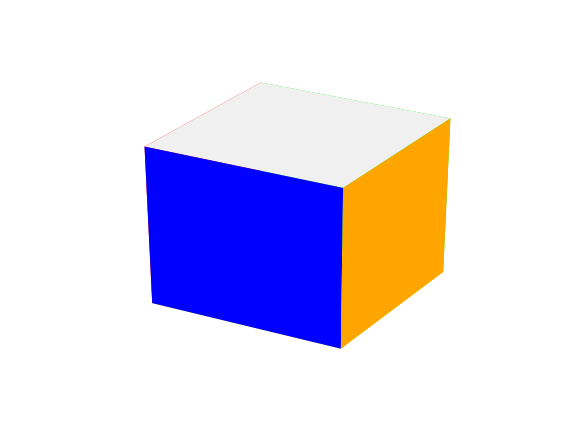

In [153]:
cube_visualizer.default_cube()

Just some check that the thing works

<IPython.core.display.Javascript object>


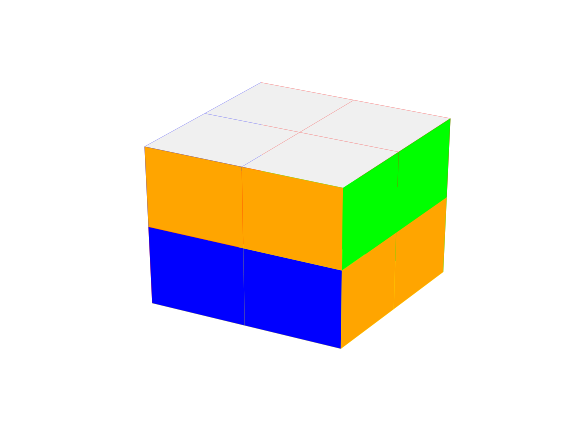

In [154]:
c=cube()
c.U()
c.plot()

<IPython.core.display.Javascript object>


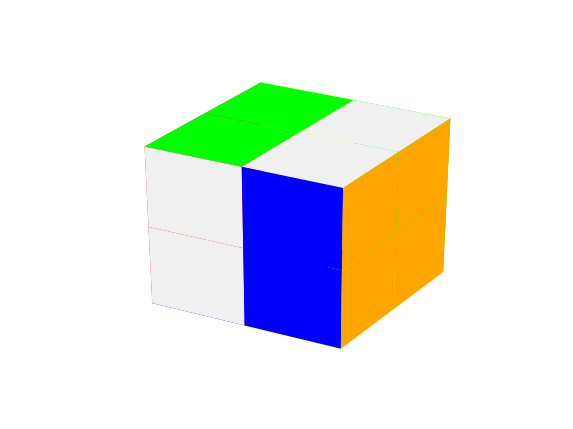

In [155]:
c=cube()
c.L()
c.plot()

<IPython.core.display.Javascript object>


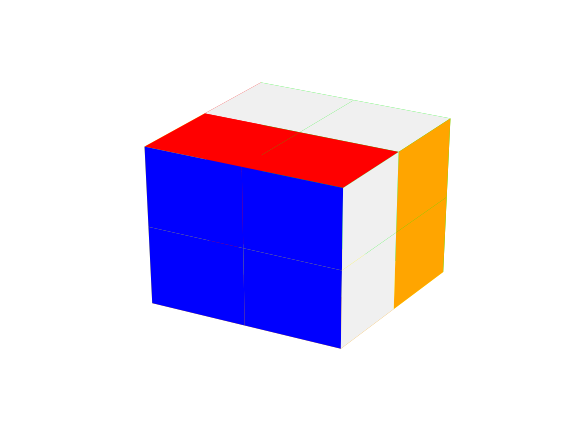

In [156]:
c=cube()
c.F()
c.plot()

<IPython.core.display.Javascript object>


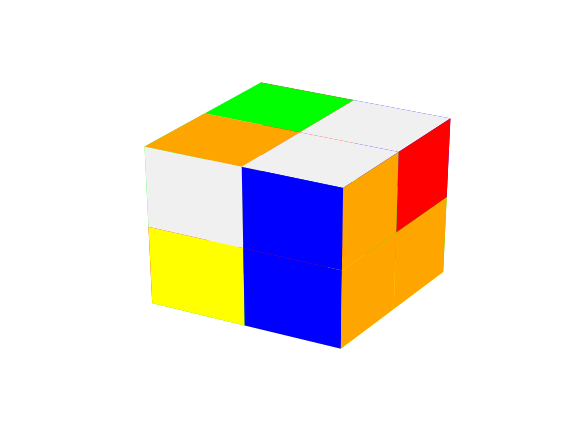

In [162]:
c=cube()
c.scramble()
c.plot()

<IPython.core.display.Javascript object>


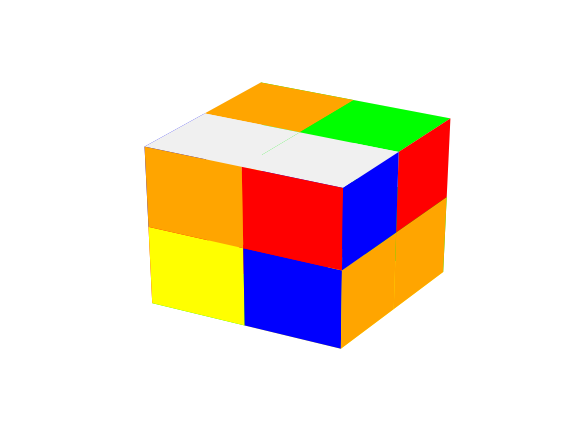

In [163]:
c2=copy.deepcopy(c)
c2.U()
c2.plot()

<IPython.core.display.Javascript object>


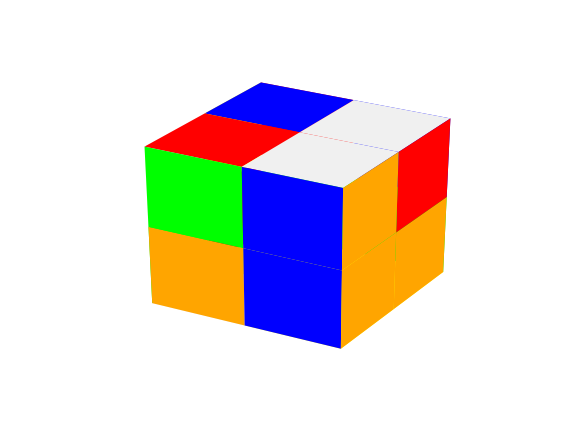

In [164]:
c2=copy.deepcopy(c)
c2.L()
c2.plot()

<IPython.core.display.Javascript object>


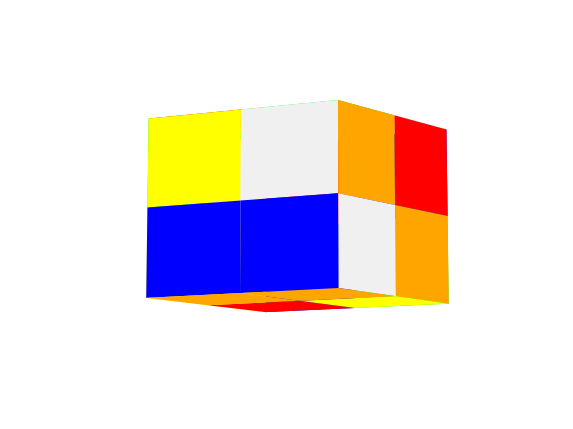

In [165]:
c2=copy.deepcopy(c)
c2.F()
c2.plot()

<IPython.core.display.Javascript object>


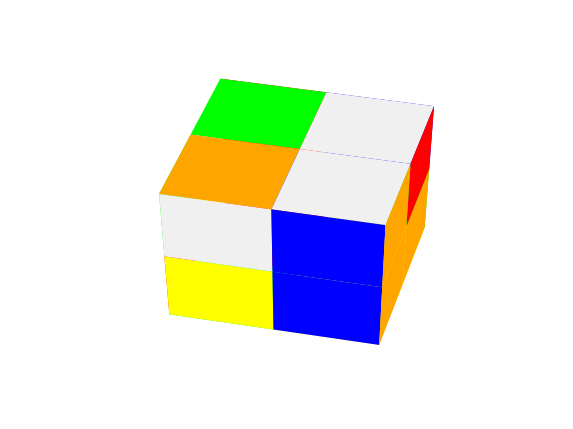

In [166]:
c.plot()

It seems to work